In [1]:
import gymnasium as gym
from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from sb3_contrib import TRPO
import torch as th

In [2]:
import gymnasium
import stable_baselines3
import sb3_contrib
import torch
import sys

print("Python version:", sys.version)
print("gymnasium:", gymnasium.__version__)
print("stable_baselines3:", stable_baselines3.__version__)
print("sb3_contrib:", sb3_contrib.__version__)
print("torch:", torch.__version__)


Python version: 3.11.9 (main, Apr 19 2024, 11:43:47) [Clang 14.0.6 ]
gymnasium: 0.29.1
stable_baselines3: 2.3.2
sb3_contrib: 2.3.0
torch: 2.3.0


In [3]:
class ChangeMassWrapper(gym.Wrapper): 
    def __init__(self, env, torso_mass):
        super().__init__(env)
        self.torso_mass = torso_mass
        self.env.model.body_mass[1] = self.torso_mass

In [4]:
from stable_baselines3.common.evaluation import evaluate_policy
from collections import defaultdict

# # load and evaluate each model
# Code derived from provided assignment PDF and stable_baselines 3 documentation
masses = [3,6,9]
eval_masses = [3,4,5,6,7,8,9]
results = defaultdict(list)
for m in masses:
  for eval_mass in eval_masses:
    eval_env = make_vec_env('Hopper-v4', n_envs = 1, seed = 1, wrapper_class = ChangeMassWrapper, wrapper_kwargs = {'torso_mass':eval_mass})
    eva_env = VecNormalize(eval_env, norm_obs=True, norm_reward = True)
    eval_env = VecNormalize.load(f'env_{m}_kg.pkl',eval_env)
    eval_env.training = False  # Important to disable training mode when evaluating
    eval_env.norm_reward = True
    ev_model = TRPO.load(f'model_{m}_kg.zip')
    mean_reward, std_reward = evaluate_policy(ev_model, eval_env, n_eval_episodes=500, deterministic = True)
    print(f'eval_mass : {eval_mass}')
    print(f'mean_reward={mean_reward:.2f} +/- {std_reward}')
    print('-----------')
    results[m].append([eval_mass,mean_reward,std_reward])

/Users/udeshhabaraduwa/anaconda3/envs/drlenv/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.model to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.model` for environment variables or `env.get_wrapper_attr('model')` that will search the reminding wrappers.
  logger.warn(


eval_mass : 3
mean_reward=3176.60 +/- 4.475380231572697
-----------


/Users/udeshhabaraduwa/anaconda3/envs/drlenv/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.model to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.model` for environment variables or `env.get_wrapper_attr('model')` that will search the reminding wrappers.
  logger.warn(


eval_mass : 4
mean_reward=757.43 +/- 57.92087186376504
-----------
eval_mass : 5
mean_reward=670.87 +/- 10.52122083724917
-----------
eval_mass : 6
mean_reward=638.17 +/- 5.378595729447892
-----------
eval_mass : 7
mean_reward=615.03 +/- 3.248174429658711
-----------
eval_mass : 8
mean_reward=609.81 +/- 5.224792665601767
-----------
eval_mass : 9
mean_reward=577.40 +/- 21.996927473974388
-----------
eval_mass : 3
mean_reward=1224.05 +/- 583.4546190622483
-----------
eval_mass : 4
mean_reward=2487.93 +/- 813.3035294880148
-----------
eval_mass : 5
mean_reward=3141.10 +/- 7.99334167658979
-----------
eval_mass : 6
mean_reward=3221.98 +/- 165.98586882883507
-----------
eval_mass : 7
mean_reward=1368.79 +/- 329.41060860098537
-----------
eval_mass : 8
mean_reward=933.48 +/- 39.315176993036864
-----------
eval_mass : 9
mean_reward=791.10 +/- 25.65718044863687
-----------
eval_mass : 3
mean_reward=408.06 +/- 612.5210391466421
-----------
eval_mass : 4
mean_reward=741.45 +/- 1066.720461773364

In [5]:
results

defaultdict(list,
            {3: [[3, 3176.6049115779997, 4.475380231572697],
              [4, 757.431098126, 57.92087186376504],
              [5, 670.871491956, 10.52122083724917],
              [6, 638.16909434, 5.378595729447892],
              [7, 615.031247464, 3.248174429658711],
              [8, 609.8077198699999, 5.224792665601767],
              [9, 577.3992219739999, 21.996927473974388]],
             6: [[3, 1224.0456572520002, 583.4546190622483],
              [4, 2487.928551956, 813.3035294880148],
              [5, 3141.1047542300003, 7.99334167658979],
              [6, 3221.9773584179998, 165.98586882883507],
              [7, 1368.7858229459998, 329.41060860098537],
              [8, 933.48224367, 39.315176993036864],
              [9, 791.099777238, 25.65718044863687]],
             9: [[3, 408.05855669999994, 612.5210391466421],
              [4, 741.451351612, 1066.7204617733641],
              [5, 3235.183627468, 11.541726640199109],
              [6, 3294.9643

In [6]:
import matplotlib.pyplot as plt

In [7]:
masses

[3, 6, 9]

In [8]:
results[9]

[[3, 408.05855669999994, 612.5210391466421],
 [4, 741.451351612, 1066.7204617733641],
 [5, 3235.183627468, 11.541726640199109],
 [6, 3294.9643455719997, 10.1934385330256],
 [7, 3368.542033402, 10.495006531306682],
 [8, 3419.98027079, 4.868993470989376],
 [9, 3478.797756586, 3.7649088226623357]]

Text(0.5, 80.7222222222222, 'Torso Mass')

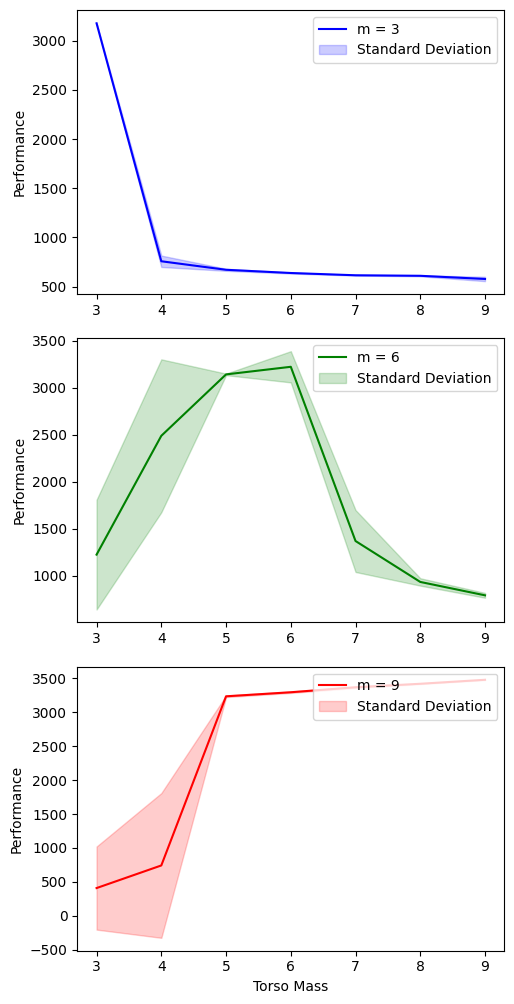

In [9]:
n_rows = 3
fig, axes = plt.subplots(nrows=n_rows, figsize=(5, 10))
fig.tight_layout()
ax = axes.ravel()
colors = ['blue','green','red']
for i,m in enumerate(masses):
    #print(results[m])
    eval_masses = [i[0] for i in results[m]]
    eval_means = [i[1] for i in results[m]]
    eval_stds = [i[2] for i in results[m]]
    ax[i].plot(eval_masses, eval_means, label = f'm = {masses[i]}', color = colors[i])
    ax[i].fill_between(eval_masses, [m - s for m, s in zip(eval_means, eval_stds)], 
                 [m + s for m, s in zip(eval_means, eval_stds)], color=colors[i], alpha=0.2, label='Standard Deviation')
    ax[i].set_ylabel('Performance')
    ax[i].legend(loc = 'upper right')
ax[2].set_xlabel('Torso Mass')


TypeError: string indices must be integers, not 'str'

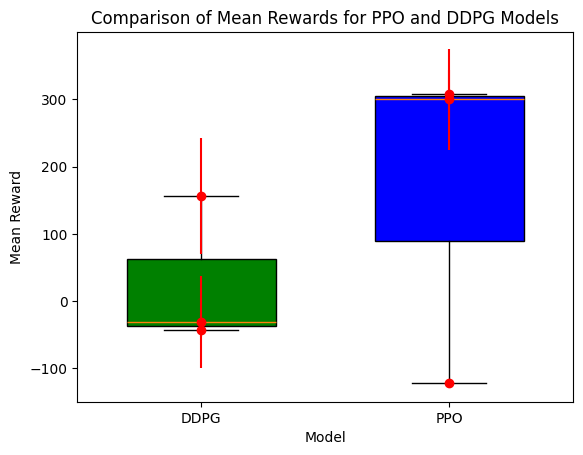

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
data = {
    "Seed": [47, 33, 12, 33, 35, 12],
    "Model": ["PPO", "PPO", "PPO", "DDPG", "DDPG", "DDPG"],
    "Mean Reward": [308.412, 300.070, -121.054, 156.306, -42.779, -31.334],
    "Std Dev": [35.803, 74.908, 3.599, 86.143, 10.779, 68.242]
}

df = pd.DataFrame(data)

# Group data by model
groups = df.groupby('Model')['Mean Reward'].apply(list).to_dict()
std_devs = df.groupby('Model')['Std Dev'].apply(list).to_dict()

# Create figure and axis
fig, ax = plt.subplots()

# Colors for each model
colors = {'PPO': 'blue', 'DDPG': 'green'}

# Generate box plots
positions = [1, 2]
for model, pos in zip(groups.keys(), positions):
    bp = ax.boxplot(groups[model], positions=[pos], widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[model]))

# Add error bars
for model, pos in zip(std_devs.keys(), positions):
    means = groups[model]
    errors = std_devs[model]
    for i in range(len(means)):
        ax.errorbar(x=pos, y=means[i], yerr=errors[i], fmt='o', color='red')

# Setting plot labels and title
ax.set_xticks(positions)
ax.set_xticklabels(groups.keys())
ax.set_title('Comparison of Mean Rewards for PPO and DDPG Models')
ax.set_xlabel('Model')
ax.set_ylabel('Mean Reward')
ax.legend([bp["boxes"][0] for bp in bp], groups.keys(), loc='upper right')
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()
